<a href="https://colab.research.google.com/github/FaridRash/eurusd-regression-forecasting/blob/main/Farid_1st.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Githhub

In [14]:
!git clone https://github.com/FaridRash/eurusd-regression-forecasting

fatal: destination path 'eurusd-regression-forecasting' already exists and is not an empty directory.


#Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Dataset

In [16]:
df = pd.read_csv('/content/eurusd-regression-forecasting/Dataset/EURUSD-2000-2020-15m.csv')
display(df.head())

,DATE_TIME,HIGH,LOW,OPEN,CLOSE
0,2000.01.03 00:00:00,1.0080,1.0073,1.0073,1.0077
1,2000.01.03 00:15:00,1.0087,1.0076,1.0078,1.0086
2,2000.01.03 00:30:00,1.0089,1.0079,1.0087,1.0079
3,2000.01.03 00:45:00,1.0132,1.0078,1.0078,1.0128
4,2000.01.03 01:00:00,1.0133,1.0120,1.0129,1.0122


In [17]:
df = df.drop('DATE_TIME', axis=1)
df = df.reset_index(drop=True)
display(df.head())

,HIGH,LOW,OPEN,CLOSE
0,1.0080,1.0073,1.0073,1.0077
1,1.0087,1.0076,1.0078,1.0086
2,1.0089,1.0079,1.0087,1.0079
3,1.0132,1.0078,1.0078,1.0128
4,1.0133,1.0120,1.0129,1.0122


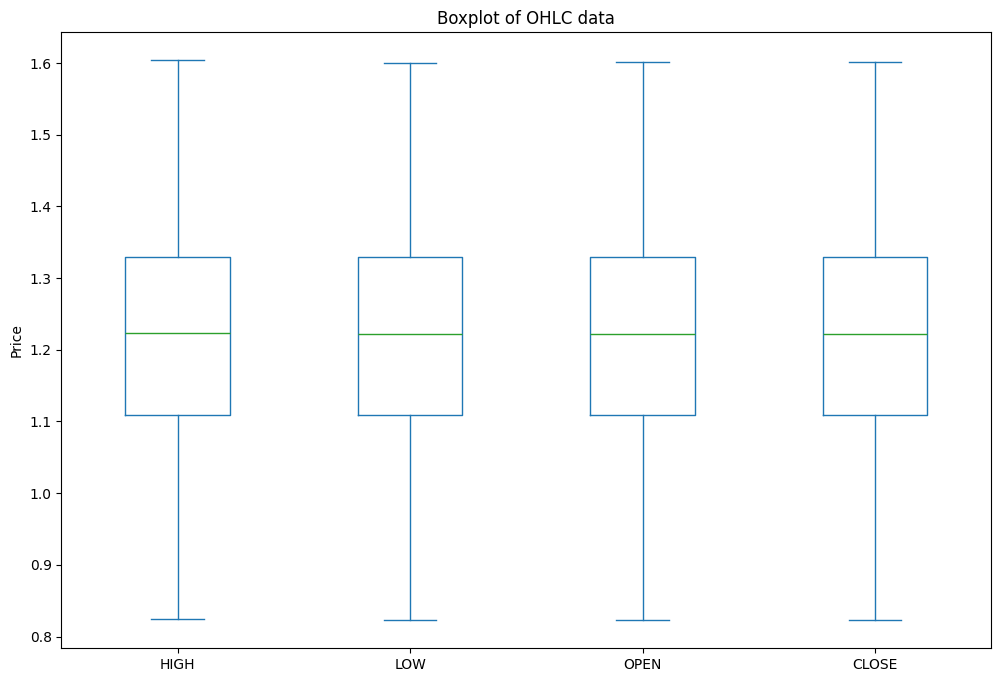

In [18]:
df.plot(kind='box', figsize=(12, 8))
plt.title('Boxplot of OHLC data')
plt.ylabel('Price')
plt.show()

#Preprocessing

In [19]:
df['target'] = df['CLOSE'].shift(-1)
display(df.head())
display(df.tail())

,HIGH,LOW,OPEN,CLOSE,target
0,1.0080,1.0073,1.0073,1.0077,1.0086
1,1.0087,1.0076,1.0078,1.0086,1.0079
2,1.0089,1.0079,1.0087,1.0079,1.0128
3,1.0132,1.0078,1.0078,1.0128,1.0122
4,1.0133,1.0120,1.0129,1.0122,1.0124


,HIGH,LOW,OPEN,CLOSE,target
500746,1.09007,1.08790,1.08803,1.08895,1.08872
500747,1.08936,1.08807,1.08895,1.08872,1.09086
500748,1.09118,1.08853,1.08872,1.09086,1.08970
500749,1.09086,1.08946,1.09086,1.08970,1.08965
500750,1.09060,1.08953,1.08974,1.08965,NaN


In [20]:
df = df.dropna()
display(df.tail())

,HIGH,LOW,OPEN,CLOSE,target
500745,1.09087,1.08771,1.08959,1.08802,1.08895
500746,1.09007,1.08790,1.08803,1.08895,1.08872
500747,1.08936,1.08807,1.08895,1.08872,1.09086
500748,1.09118,1.08853,1.08872,1.09086,1.08970
500749,1.09086,1.08946,1.09086,1.08970,1.08965


#Splitting

In [21]:
from sklearn.model_selection import train_test_split

X = df[['HIGH', 'LOW', 'OPEN', 'CLOSE']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (400600, 4)
X_test shape: (100150, 4)
y_train shape: (400600,)
y_test shape: (100150,)


#Standardization

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('X_train_scaled shape:', X_train_scaled.shape)
print('X_test_scaled shape:', X_test_scaled.shape)

X_train_scaled shape: (400600, 4)
X_test_scaled shape: (100150, 4)


#RF Regression

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
rfr = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rfr.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [26]:
print(f'R-squared: {r2}')

R-squared: 0.9999751380094531


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = rfr.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.0005419305259152371
Mean Squared Error: 6.860263452539721e-07
R-squared: 0.9999751380094531


In [28]:
from sklearn.metrics import r2_score

# Make predictions on the train set
y_train_pred = rfr.predict(X_train_scaled)

# Evaluate the model on the train set
r2_train = r2_score(y_train, y_train_pred)

print(f'Train R-squared: {r2_train}')
print(f'Test R-squared: {r2}')

Train R-squared: 0.9999963784481875
Test R-squared: 0.9999751380094531


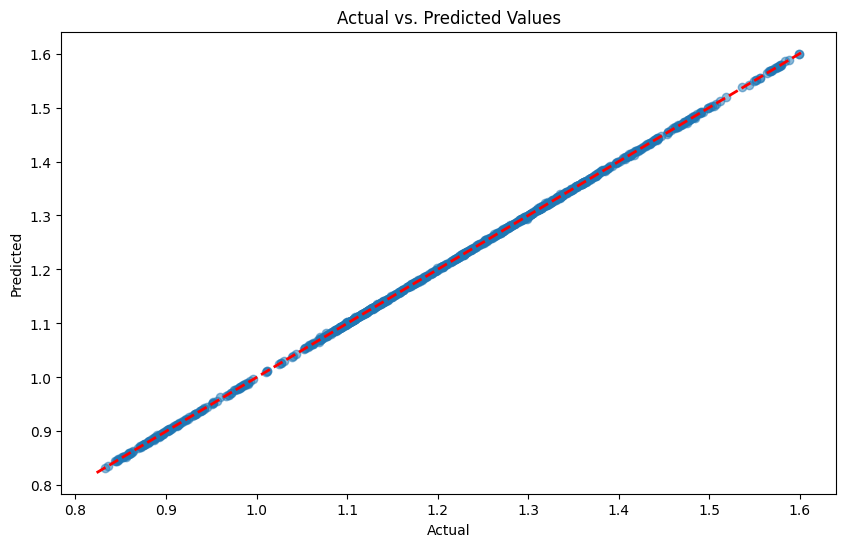

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test[:1000], y_pred[:1000], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()